# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**⚠️ DISCLAIMER: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. ⚠️**

## Overview

This notebook explores Dandiset 001361, which contains 2-photon imaging data from hippocampal area CA1 during virtual reality navigation in mice. The data was collected as part of the study "A flexible hippocampal population code for experience relative to reward" by Sosa, Plitt, & Giocomo, published in Nature Neuroscience.

The Dandiset can be accessed at: https://dandiarchive.org/dandiset/001361

In this notebook, we will:

1. Connect to the DANDI archive and load the Dandiset
2. Examine the metadata of the Dandiset
3. Browse the available assets
4. Load and explore a specific NWB file
5. Visualize behavioral and neural data from the experiment

## Required Packages

This notebook requires the following packages:

- dandi
- pynwb
- h5py
- remfile
- matplotlib
- numpy
- pandas
- seaborn

## Connecting to DANDI and Loading the Dandiset

First, we'll use the DANDI API to connect to the archive and load Dandiset 001361. This will allow us to explore the metadata and assets contained in the dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict

# Set matplotlib parameters
plt.rcParams['figure.figsize'] = (12, 8)

# Set seaborn theme
sns.set_theme()

# Connect to DANDI archive
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:500]}...")

# Handle contributor list (might be dictionaries or strings)
contributors = metadata.get('contributor', [])
contributor_names = []
for contributor in contributors:
    if isinstance(contributor, dict) and 'name' in contributor:
        contributor_names.append(contributor['name'])
    elif isinstance(contributor, str):
        contributor_names.append(contributor)

print(f"Contributors: {', '.join(contributor_names) if contributor_names else 'Not specified'}")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045
Description: 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

To reinforce rewarding behaviors, events leading up to and following rewards must be remembered. Hippocampal place cell activity spans spatial and non-spatial episodes, but whether hippocampal activity encodes entire sequences of events relative to reward is u...
Contributors: National Institutes of Health (NIH), Sosa, Marielena, Plitt, Mark H., Giocomo, Lisa M.


## Exploring the Assets in the Dandiset

Now, let's list the assets available in this Dandiset to get an overview of the data files.

In [2]:
# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")

# Group assets by subject
subjects = defaultdict(list)
for asset in assets:
    if 'sub-' in asset.path:
        subject = asset.path.split('/')[0]
        subjects[subject].append(asset)

# Print summary of subjects and sessions
print("\nSubject summary:")
for subject, subject_assets in subjects.items():
    print(f"- {subject}: {len(subject_assets)} sessions")

# Display the first 5 assets
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path} ({asset.size / 1e6:.1f} MB)")


Found 152 assets in the dataset

Subject summary:
- sub-m11: 12 sessions
- sub-m12: 14 sessions
- sub-m13: 14 sessions
- sub-m14: 14 sessions
- sub-m15: 14 sessions
- sub-m17: 14 sessions
- sub-m18: 14 sessions
- sub-m19: 14 sessions
- sub-m3: 14 sessions
- sub-m4: 14 sessions
- sub-m7: 14 sessions

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (99.3 MB)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (89.7 MB)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (119.7 MB)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (94.6 MB)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (128.4 MB)


## Loading and Exploring a Specific NWB File

Now, let's load a specific NWB file from the dataset to explore its contents. We'll focus on `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`, which contains both behavioral and optical physiology (imaging) data.

We'll use the `remfile` and `h5py` modules to stream the file directly from the DANDI archive.

In [3]:
import pynwb
import h5py
import remfile

# Load the selected NWB file
asset_id = "d77ea78a-8978-461d-9d11-3c5cef860d82"
asset_path = "sub-m11/sub-m11_ses-03_behavior+ophys.nwb"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

print(f"Loading NWB file: {asset_path}")
print(f"URL: {url}")

remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("\nNWB file loaded successfully!")

Loading NWB file: sub-m11/sub-m11_ses-03_behavior+ophys.nwb
URL: https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully!


## Examining the NWB File Metadata

Now that we've loaded the NWB file, let's examine its metadata to understand what data it contains.

In [4]:
# Print basic metadata about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Experiment identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File creation date: {nwb.file_create_date}")
print(f"Experimenter: {', '.join(nwb.experimenter)}")
print(f"Institution: {getattr(nwb, 'institution', 'Not specified')}")
print(f"Session ID: {nwb.session_id}")

# Print subject information
print("\nSubject information:")
print(f"  ID: {nwb.subject.subject_id}")
print(f"  Species: {nwb.subject.species}")
print(f"  Sex: {nwb.subject.sex}")
print(f"  Date of birth: {nwb.subject.date_of_birth}")

Session description: processed suite2p data
Experiment identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session start time: 2023-02-23 00:00:00-08:00
File creation date: [datetime.datetime(2025, 3, 12, 23, 45, 29, 830157, tzinfo=tzoffset(None, -25200))]
Experimenter: Mari Sosa
Institution: None
Session ID: 03

Subject information:
  ID: m11
  Species: Mus musculus
  Sex: M
  Date of birth: 2022-09-20 00:00:00-07:00


## Exploring the Behavioral Data

This dataset contains rich behavioral data collected during a virtual reality navigation experiment. Let's explore the behavioral data to understand what the mouse was doing during the recording.

In [5]:
# Get behavioral data
behavior = nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries']
print("Available behavioral measurements:")
for ts_name in behavior.time_series:
    print(f"- {ts_name}: {behavior.time_series[ts_name].description}")
    print(f"  Unit: {behavior.time_series[ts_name].unit}")
    print(f"  Shape: {behavior.time_series[ts_name].data.shape}")

Available behavioral measurements:
- Reward: reward delivery
  Unit: mL
  Shape: (69,)
- autoreward: whether trial was automatically rewarded if the subject failed to lick
  Unit: integer
  Shape: (20684,)
- environment: Virtual reality environment
  Unit: AU
  Shape: (20684,)
- lick: lick detection by capacitive sensor, cumulative per imaging frame
  Unit: AU
  Shape: (20684,)
- position: Position in a virtual linear track
  Unit: cm
  Shape: (20684,)
- reward_zone: reward zone entry (binary)
  Unit: integer
  Shape: (20684,)
- scanning: whether scanning occurred to collect ophys data
  Unit: integer
  Shape: (20684,)
- speed: the speed of the subject measured over time
  Unit: cm/s
  Shape: (20684,)
- teleport: end of a trial, i.e. entry into the intertrial interval
  Unit: integer
  Shape: (20684,)
- trial number: trial number, where each trial is a lap of the track
  Unit: integer
  Shape: (20684,)
- trial_start: start of a trial, i.e. entry to the linear track
  Unit: integer
  Sh

Let's examine some of the key behavioral measurements: position, speed, and reward. First, let's look at the position of the mouse in the virtual environment over time.

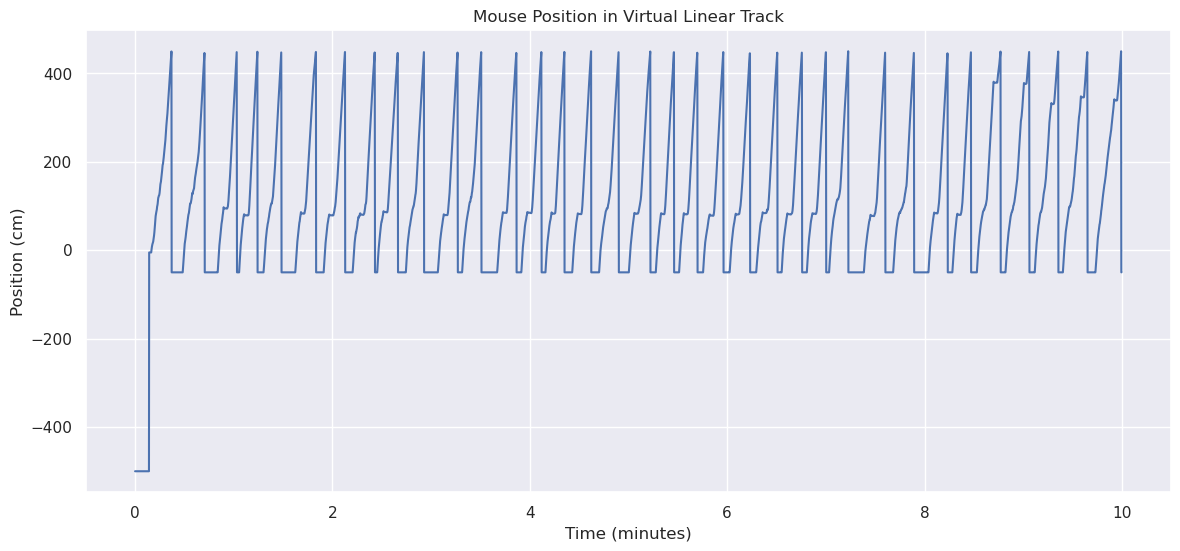

In [6]:
# Load a subset of the position data for visualization
# Using a 10-minute window for better visualization
position = behavior.time_series['position']
time_subset = slice(0, 9300)  # Approximately 10 minutes at 15.5Hz sampling rate

# Get timestamps and position data
timestamps = position.timestamps[time_subset]
positions = position.data[time_subset]

# Create a time vector in minutes for better readability
time_minutes = (timestamps - timestamps[0]) / 60

# Plot position over time
plt.figure(figsize=(14, 6))
plt.plot(time_minutes, positions, 'b-')
plt.xlabel('Time (minutes)')
plt.ylabel(f'Position ({position.unit})')
plt.title('Mouse Position in Virtual Linear Track')
plt.grid(True)
plt.show()

Next, let's look at the speed of the mouse over the same time period.

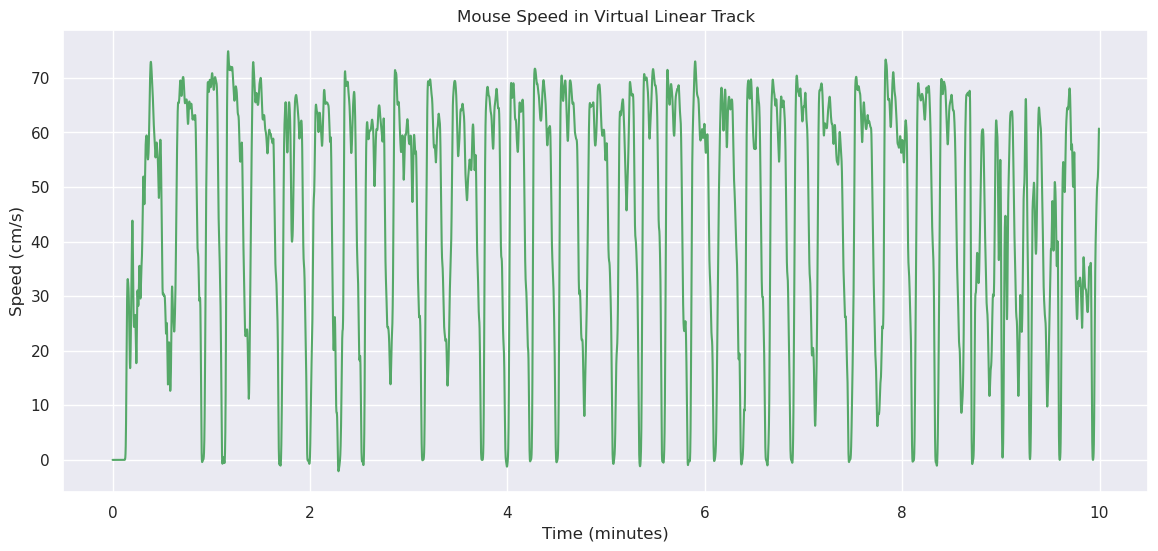

In [7]:
# Get speed data
speed = behavior.time_series['speed']
speeds = speed.data[time_subset]

# Plot speed over time
plt.figure(figsize=(14, 6))
plt.plot(time_minutes, speeds, 'g-')
plt.xlabel('Time (minutes)')
plt.ylabel(f'Speed ({speed.unit})')
plt.title('Mouse Speed in Virtual Linear Track')
plt.grid(True)
plt.show()

Now, let's look at the reward zone entries and actual reward deliveries:

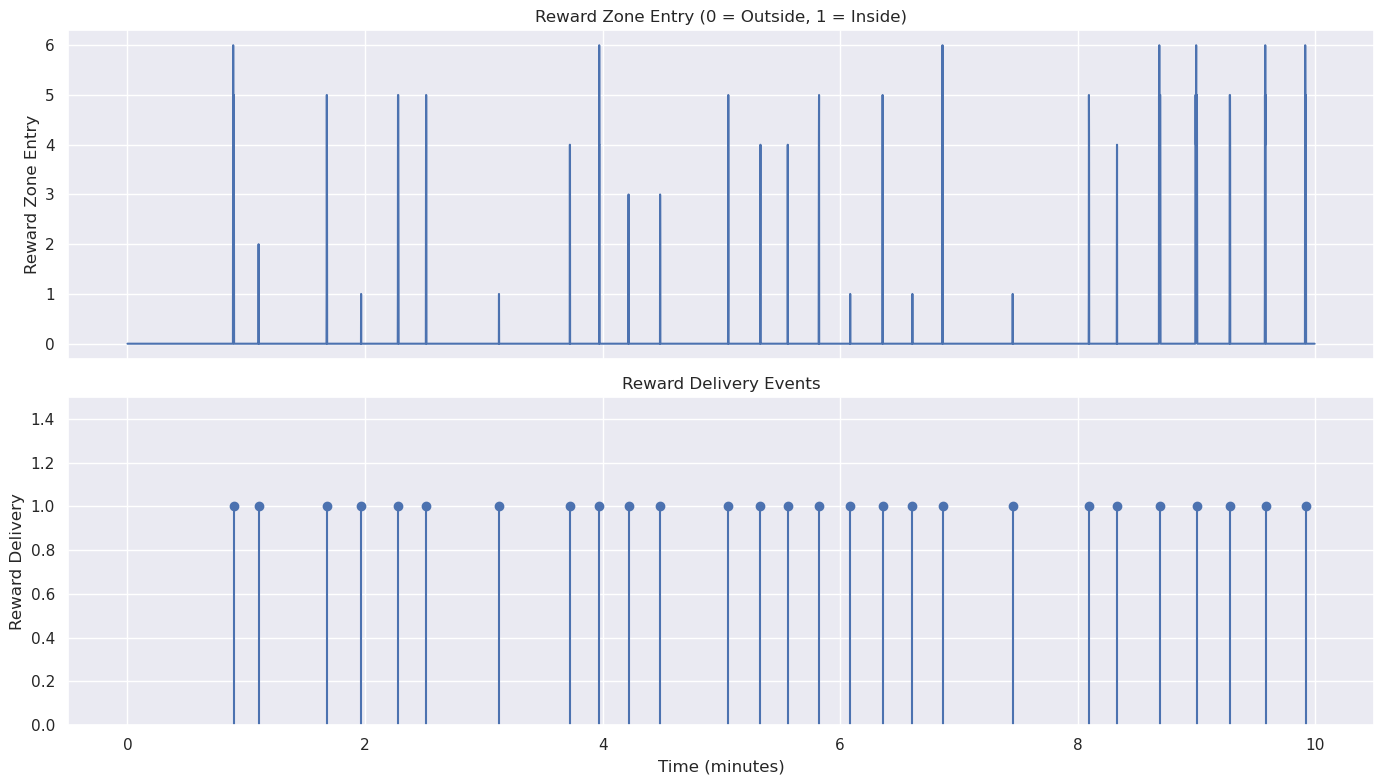

In [8]:
# Get reward_zone data (binary indicator of when mouse enters reward zone)
reward_zone = behavior.time_series['reward_zone']
reward_zone_data = reward_zone.data[time_subset]

# Get actual reward delivery timestamps
reward = behavior.time_series['Reward']
# Convert reward timestamps to minutes from start for consistency
reward_times_min = [(rt - timestamps[0]) / 60 for rt in reward.timestamps if timestamps[0] <= rt <= timestamps[-1]]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot reward zone entries (top subplot)
ax1.plot(time_minutes, reward_zone_data, 'b-')
ax1.set_ylabel('Reward Zone Entry')
ax1.set_title('Reward Zone Entry (0 = Outside, 1 = Inside)')
ax1.grid(True)

# Plot actual reward deliveries (bottom subplot)
# Use stem plot for discrete reward events
ax2.stem(reward_times_min, np.ones_like(reward_times_min), basefmt=' ')
ax2.set_xlabel('Time (minutes)')
ax2.set_ylabel('Reward Delivery')
ax2.set_title('Reward Delivery Events')
ax2.set_ylim(0, 1.5)
ax2.grid(True)

plt.tight_layout()
plt.show()

Let's also examine how licking behavior relates to reward zone entries and rewards:

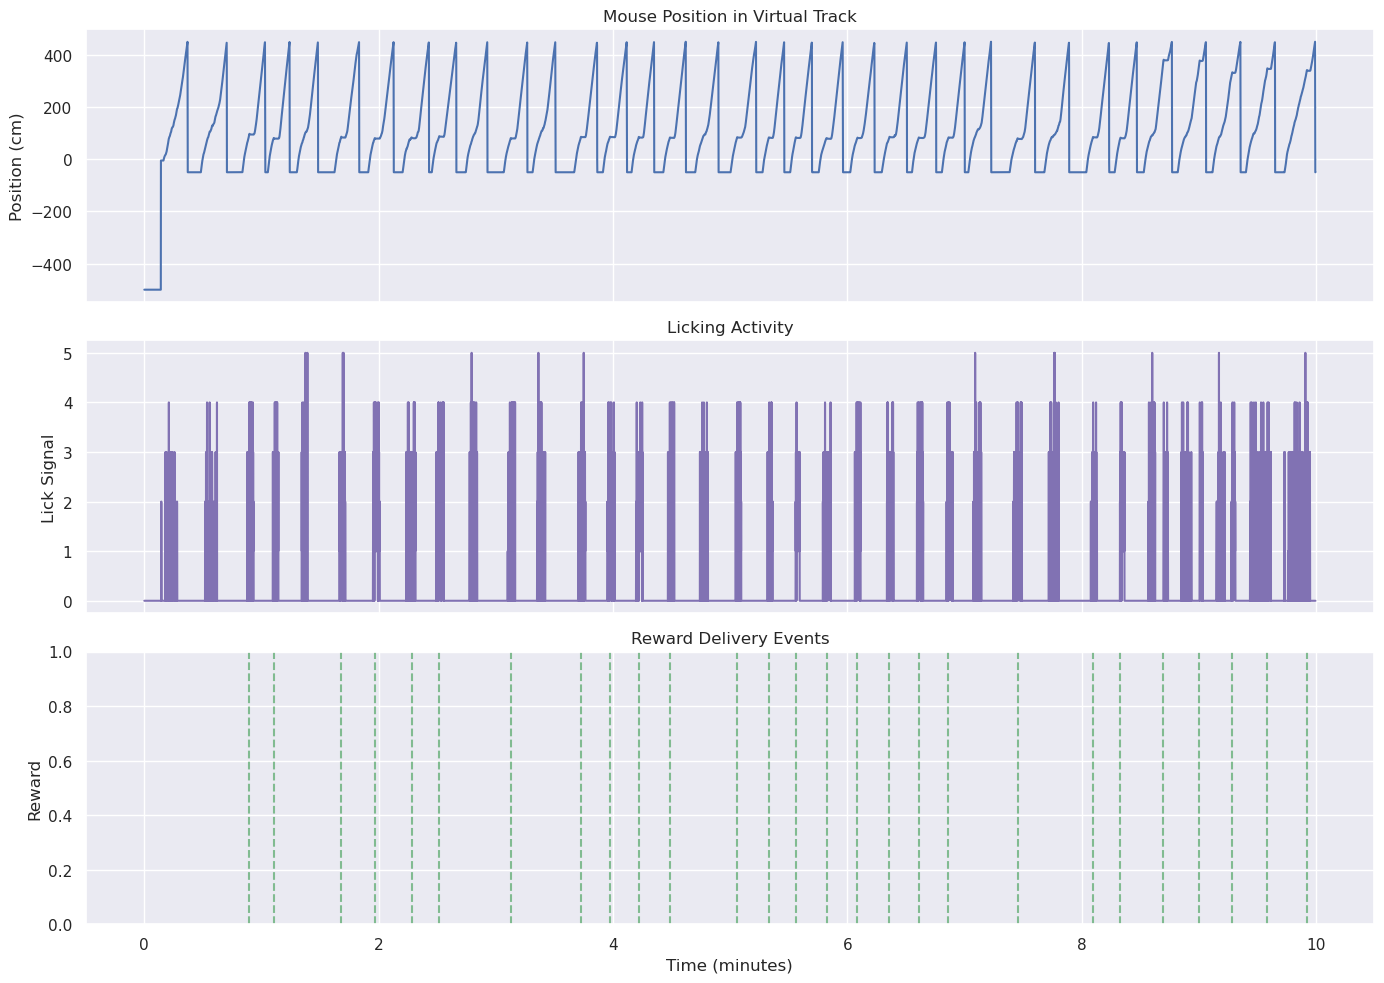

In [9]:
# Get lick data 
lick = behavior.time_series['lick']
lick_data = lick.data[time_subset]

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Plot position (top subplot)
ax1.plot(time_minutes, positions, 'b-')
ax1.set_ylabel(f'Position ({position.unit})')
ax1.set_title('Mouse Position in Virtual Track')
ax1.grid(True)

# Plot lick events (middle subplot)
ax2.plot(time_minutes, lick_data, 'm-')
ax2.set_ylabel('Lick Signal')
ax2.set_title('Licking Activity')
ax2.grid(True)

# Plot reward deliveries (bottom subplot)
for rt in reward_times_min:
    ax3.axvline(x=rt, color='g', linestyle='--', alpha=0.7)
ax3.set_xlabel('Time (minutes)')
ax3.set_ylabel('Reward')
ax3.set_title('Reward Delivery Events')
ax3.set_ylim(0, 1)
ax3.grid(True)

plt.tight_layout()
plt.show()

Let's also analyze the relationship between position and licking behavior:

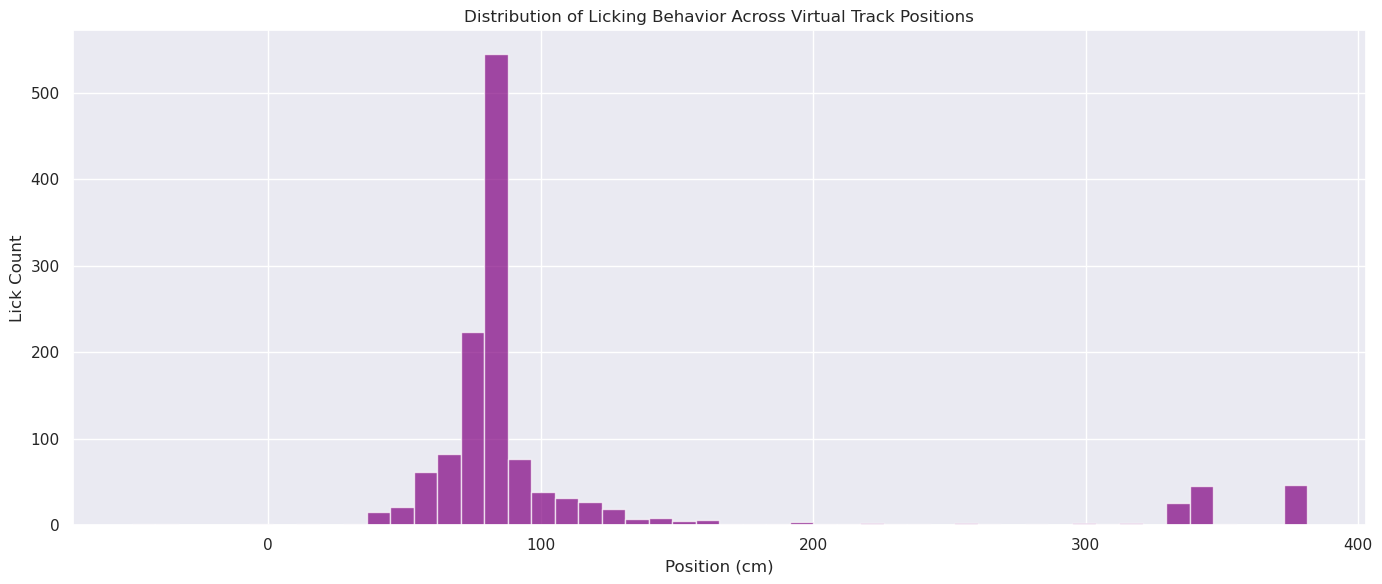

In [10]:
# Create a 2D histogram of position vs. licking
fig, ax = plt.subplots(figsize=(14, 6))

# We'll only use points where licking occurred (lick_data > 0)
lick_idx = lick_data > 0
position_with_licking = positions[lick_idx]

if len(position_with_licking) > 0:
    # Create a histogram of licking positions
    ax.hist(position_with_licking, bins=50, color='purple', alpha=0.7)
    ax.set_xlabel(f'Position ({position.unit})')
    ax.set_ylabel('Lick Count')
    ax.set_title('Distribution of Licking Behavior Across Virtual Track Positions')
    ax.grid(True)
else:
    ax.text(0.5, 0.5, 'No licking detected in this time window', 
            horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

## Exploring Neural Activity Data

Now let's look at the neural activity recorded from CA1. This Dandiset contains calcium imaging data from neurons in the hippocampus.

In [11]:
# Examine the ophys data organization
ophys = nwb.processing['ophys'].data_interfaces
print("Available ophys data interfaces:")
for name in ophys:
    print(f"- {name}")

Available ophys data interfaces:
- Backgrounds_0
- Deconvolved
- Fluorescence
- ImageSegmentation
- Neuropil


Let's examine the cell segmentation data to understand the neuron population being recorded.

In [12]:
# Look at the plane segmentation (segmented cells)
plane_segmentation = nwb.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']

# Get basic information about the segmented neurons
cell_count = len(plane_segmentation.id[:])
print(f"Number of segmented ROIs: {cell_count}")

# Get which are classified as cells vs non-cells
iscell = plane_segmentation.iscell[:]
cell_ids = np.where(iscell[:, 0] == 1)[0]
print(f"Number of ROIs classified as cells: {len(cell_ids)}")

# Look at one of the background images 
images = nwb.processing['ophys'].data_interfaces['Backgrounds_0'].images
print("Available background images:")
for name in images:
    print(f"- {name}: {images[name].data.shape}")

Number of segmented ROIs: 349
Number of ROIs classified as cells: 155
Available background images:
- Vcorr: (512, 796)
- max_proj: (512, 796)
- meanImg: (512, 796)


Now let's look at the fluorescence data for the neurons:

Fluorescence data shape: (19818, 349)
Sampling rate: 15.5078125 Hz


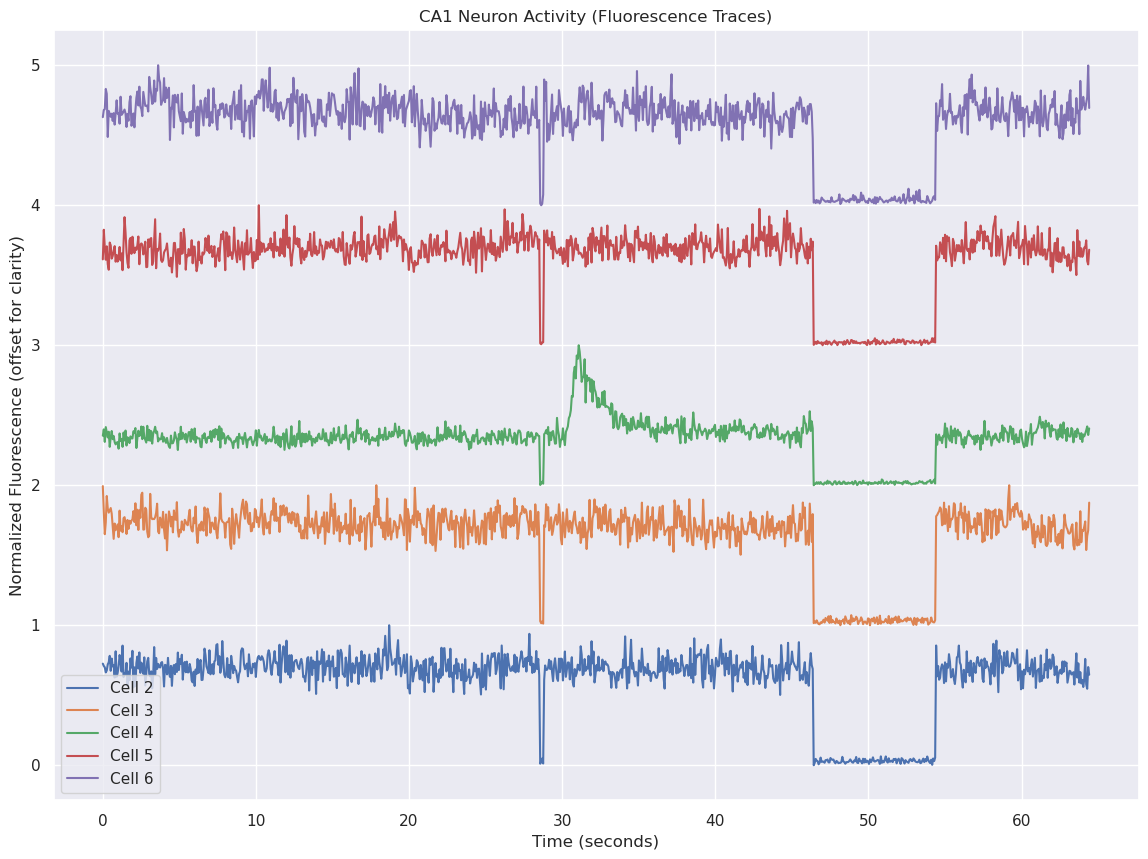

In [13]:
# Get the fluorescence data
fluorescence = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['plane0']
print(f"Fluorescence data shape: {fluorescence.data.shape}")
print(f"Sampling rate: {fluorescence.rate} Hz")

# Get timestamps for the fluorescence data
# Use a subset for visualization (first 1000 timepoints)
time_subset_f = slice(0, 1000)
f_timestamps = np.arange(fluorescence.data.shape[0])[time_subset_f] / fluorescence.rate
f_data = fluorescence.data[time_subset_f, :]

# Select a small number of neurons (first 5 cells) to visualize
cells_to_plot = cell_ids[:5]

# Plot the fluorescence traces for these cells
plt.figure(figsize=(14, 10))
for i, cell_id in enumerate(cells_to_plot):
    # Normalize the trace for better visualization
    trace = f_data[:, cell_id]
    normalized_trace = (trace - np.min(trace)) / (np.max(trace) - np.min(trace)) + i
    plt.plot(f_timestamps, normalized_trace, label=f'Cell {cell_id}')

plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Fluorescence (offset for clarity)')
plt.title('CA1 Neuron Activity (Fluorescence Traces)')
plt.legend()
plt.grid(True)
plt.show()

Let's also look at the deconvolved signals, which provide an estimate of the underlying neural spike activity:

Deconvolved data shape: (19818, 349)


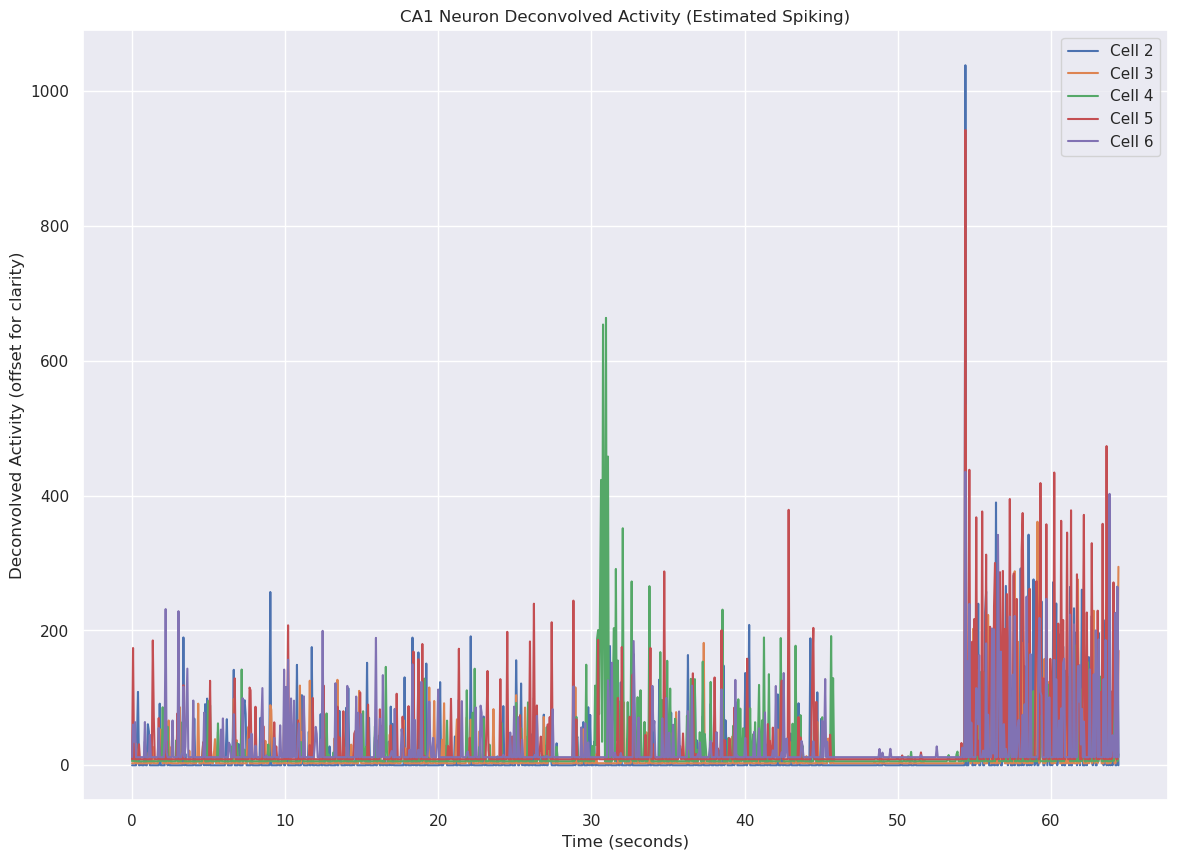

In [14]:
# Get the deconvolved data
deconvolved = nwb.processing['ophys'].data_interfaces['Deconvolved'].roi_response_series['plane0']
print(f"Deconvolved data shape: {deconvolved.data.shape}")

# Get deconvolved data for the same time subset and cells
deconv_data = deconvolved.data[time_subset_f, :]

# Plot the deconvolved traces for the same cells
plt.figure(figsize=(14, 10))
for i, cell_id in enumerate(cells_to_plot):
    # Offset traces for clarity
    trace = deconv_data[:, cell_id]
    offset_trace = trace + i*3  # Larger offset for deconvolved data
    plt.plot(f_timestamps, offset_trace, label=f'Cell {cell_id}')

plt.xlabel('Time (seconds)')
plt.ylabel('Deconvolved Activity (offset for clarity)')
plt.title('CA1 Neuron Deconvolved Activity (Estimated Spiking)')
plt.legend()
plt.grid(True)
plt.show()

## Analyzing Neural Responses in Relation to Behavior

Now, let's examine how the neural activity relates to the behavior. Specifically, let's look at whether any neurons have place fields (i.e., fire preferentially at specific positions in the virtual track).

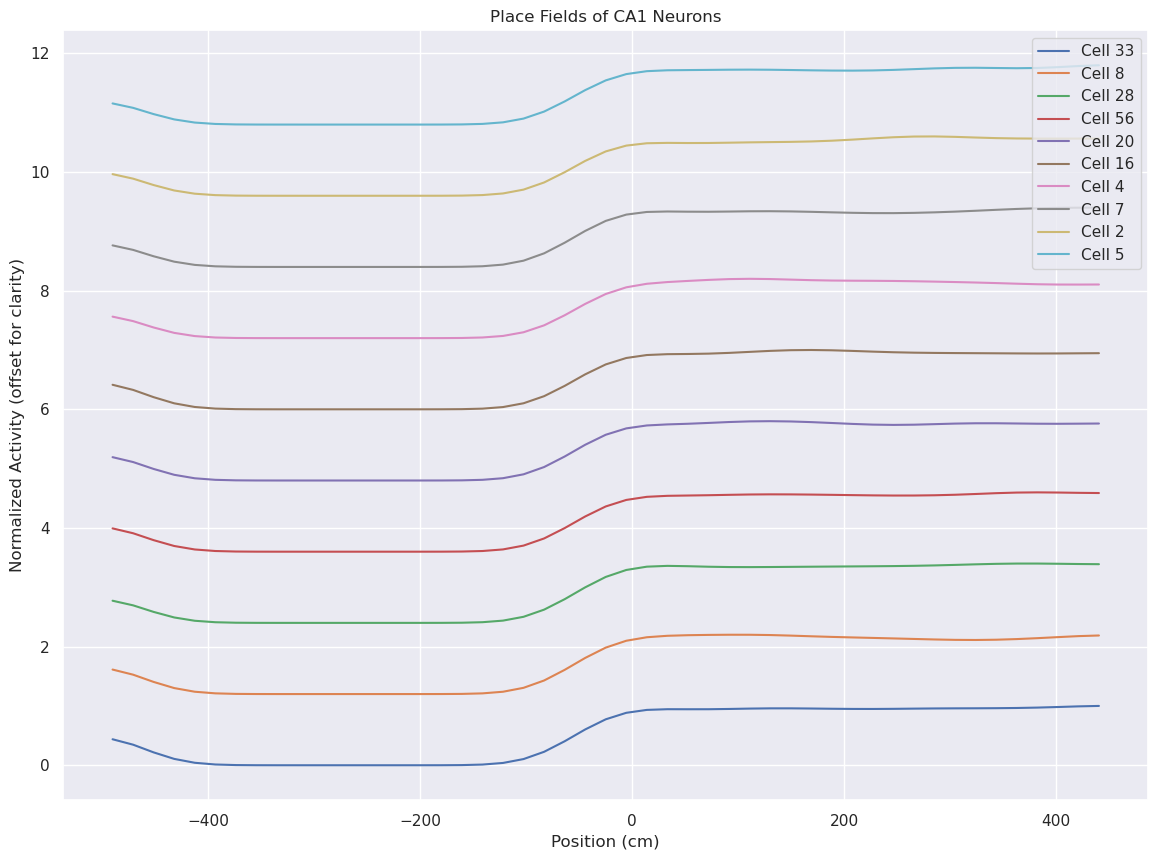

In [15]:
# Calculate place fields for a subset of neurons
# First, get position and neural data for a longer period
time_period = slice(0, 9300)  # Same 10 minutes we used earlier
pos_data = behavior.time_series['position'].data[time_period]
pos_timestamps = behavior.time_series['position'].timestamps[time_period]

# Get corresponding neural activity data
# We need to align the timestamps between behavior and neural data
f_timestamps_full = np.arange(fluorescence.data.shape[0]) / fluorescence.rate
f_data_full = fluorescence.data[:, cell_ids]

# Define position bins for place field calculation
pos_bins = np.linspace(np.min(pos_data), np.max(pos_data), 50)
bin_centers = (pos_bins[:-1] + pos_bins[1:]) / 2
place_fields = np.zeros((len(cell_ids), len(bin_centers)))

# For each position sample, find the closest fluorescence timestamp
# and assign that neural activity to the corresponding position bin
for i, (pos, pos_ts) in enumerate(zip(pos_data, pos_timestamps)):
    # Find nearest neural data timestamp
    nearest_idx = np.argmin(np.abs(f_timestamps_full - pos_ts))
    
    # Find position bin
    bin_idx = np.digitize(pos, pos_bins) - 1
    
    # Ensure bin_idx is valid
    if 0 <= bin_idx < len(bin_centers):
        # Add activity for all cells at this position
        place_fields[:, bin_idx] += f_data_full[nearest_idx, :]

# Normalize place fields by bin occupancy
# Count number of samples in each bin
bin_counts = np.histogram(pos_data, bins=pos_bins)[0]
# Avoid division by zero
bin_counts[bin_counts == 0] = 1

# Normalize
for i in range(place_fields.shape[0]):
    place_fields[i] = place_fields[i] / bin_counts

# Smooth place fields with a gaussian filter
from scipy.ndimage import gaussian_filter1d
smoothed_place_fields = np.zeros_like(place_fields)
for i in range(place_fields.shape[0]):
    smoothed_place_fields[i] = gaussian_filter1d(place_fields[i], sigma=2)

# Plot place fields for a subset of neurons
# Select neurons with clear place fields (highest peak-to-mean ratio)
peak_to_mean = np.max(smoothed_place_fields, axis=1) / np.mean(smoothed_place_fields, axis=1)
top_place_cells = np.argsort(peak_to_mean)[-10:]  # Top 10 cells

plt.figure(figsize=(14, 10))
for i, cell_idx in enumerate(top_place_cells):
    # Normalize for visualization
    place_field = smoothed_place_fields[cell_idx]
    normalized_pf = (place_field - np.min(place_field)) / (np.max(place_field) - np.min(place_field))
    plt.plot(bin_centers, normalized_pf + i*1.2, label=f'Cell {cell_ids[cell_idx]}')

plt.xlabel('Position (cm)')
plt.ylabel('Normalized Activity (offset for clarity)')
plt.title('Place Fields of CA1 Neurons')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Let's create a heatmap visualization of the place fields for these top place cells:

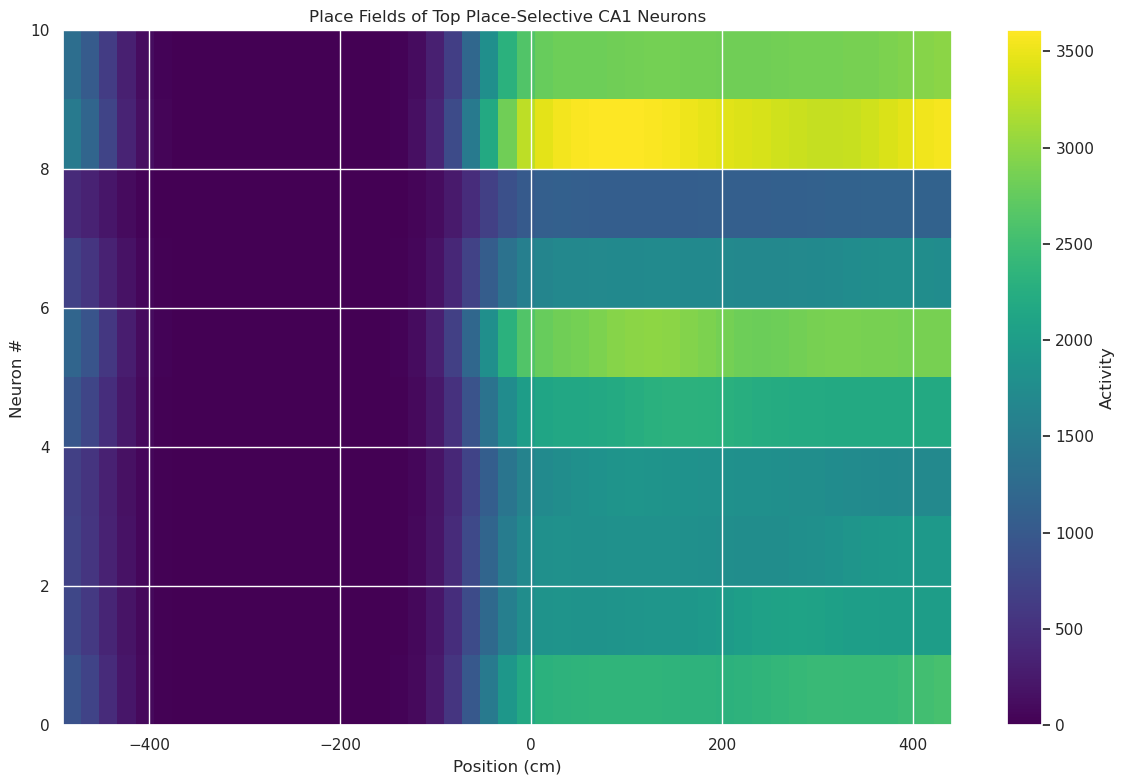

In [16]:
# Create a heatmap of place fields for the top cells
plt.figure(figsize=(12, 8))
plt.imshow(smoothed_place_fields[top_place_cells], aspect='auto', cmap='viridis', 
           extent=[bin_centers[0], bin_centers[-1], 0, len(top_place_cells)])

plt.colorbar(label='Activity')
plt.xlabel('Position (cm)')
plt.ylabel('Neuron #')
plt.title('Place Fields of Top Place-Selective CA1 Neurons')
plt.tight_layout()
plt.show()

## Examining Reward-Related Responses

Since this dataset is focused on how hippocampal neurons encode information relative to rewards, let's examine neural responses around reward delivery.

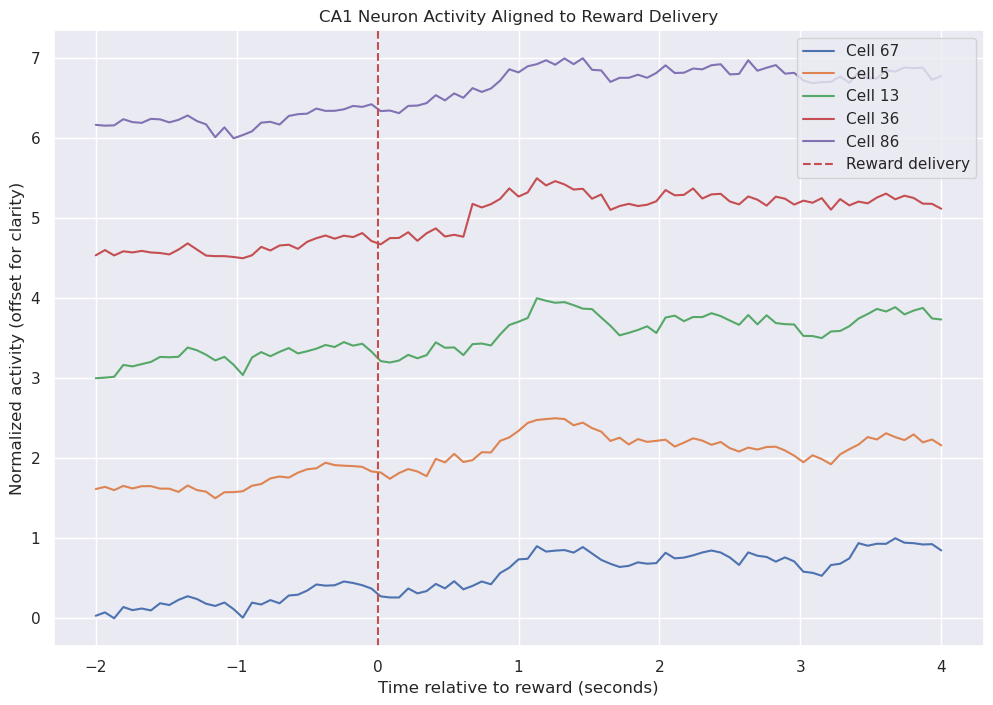

In [17]:
# Analyze neural activity around reward delivery
# Get reward timestamps
reward_timestamps = behavior.time_series['Reward'].timestamps[:]

# Define a window around reward delivery, in seconds
pre_reward = 2.0  # 2 seconds before reward
post_reward = 4.0  # 4 seconds after reward

# Sampling rate of neural data
sampling_rate = fluorescence.rate
pre_samples = int(pre_reward * sampling_rate)
post_samples = int(post_reward * sampling_rate)

# Collect neural activity around each reward event
reward_aligned_activity = []

for reward_time in reward_timestamps:
    # Find closest timestamp in neural data
    closest_idx = np.argmin(np.abs(f_timestamps_full - reward_time))
    
    # Make sure we can extract a full window
    if closest_idx >= pre_samples and closest_idx + post_samples < len(f_timestamps_full):
        window_start = closest_idx - pre_samples
        window_end = closest_idx + post_samples
        
        # Extract neural activity for all cells in this window
        window_activity = f_data_full[window_start:window_end, :]
        reward_aligned_activity.append(window_activity)

# Convert to numpy array and average across reward events
if reward_aligned_activity:
    reward_aligned_activity = np.array(reward_aligned_activity)
    mean_reward_response = np.mean(reward_aligned_activity, axis=0)
    
    # Create time axis centered at reward
    time_axis = np.linspace(-pre_reward, post_reward, mean_reward_response.shape[0])
    
    # Plot the average response for a subset of neurons
    # Choose neurons with the strongest response around reward (largest variance)
    response_variance = np.var(mean_reward_response, axis=0)
    top_reward_cells = np.argsort(response_variance)[-5:]  # Top 5 reward-responsive cells
    
    plt.figure(figsize=(12, 8))
    for i, cell_idx in enumerate(top_reward_cells):
        # Extract and normalize the trace for better visualization
        trace = mean_reward_response[:, cell_idx]
        normalized_trace = (trace - np.min(trace)) / (np.max(trace) - np.min(trace)) + i*1.5
        plt.plot(time_axis, normalized_trace, label=f'Cell {cell_ids[cell_idx]}')
    
    plt.axvline(x=0, color='r', linestyle='--', label='Reward delivery')
    plt.xlabel('Time relative to reward (seconds)')
    plt.ylabel('Normalized activity (offset for clarity)')
    plt.title('CA1 Neuron Activity Aligned to Reward Delivery')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No valid reward events found for analysis")

## Summary and Future Directions

In this notebook, we've explored data from Dandiset 001361, which contains 2-photon calcium imaging data from the CA1 region of the hippocampus in mice navigating a virtual reality environment.

We've examined:

1. The structure and metadata of the Dandiset
2. Behavioral data, including position, speed, and licking
3. Neural activity in CA1 neurons
4. Place fields of CA1 neurons
5. Neural responses aligned to reward delivery

These analyses reveal that CA1 neurons exhibit both spatial (place) and reward-related activity patterns, consistent with the findings described in the associated paper, which discusses how hippocampal neurons flexibly encode both spatial information and experience relative to reward.

### Future Directions

There are many additional analyses that could be performed with this rich dataset:

1. **Learning-related changes**: Compare neural activity patterns across multiple sessions to examine how representations evolve with learning

2. **Population dynamics**: Use dimensionality reduction techniques (e.g., PCA, t-SNE) to visualize how the entire neural population represents information

3. **Predictive modeling**: Build models to predict animal behavior from neural activity, or vice versa

4. **Cross-session comparison**: Compare data across different mice and sessions to understand individual variability

5. **Advanced place field analysis**: Examine remapping of place fields when reward locations change

6. **Trial-by-trial analysis**: Analyze how neural activity patterns change on a trial-by-trial basis, especially around the times when reward locations were changed

This dataset provides a valuable resource for studying how hippocampal neurons represent both spatial information and reward-related experiences.